#### (1) cv2.resize()

- to the specified size

In [1]:
import cv2

img = cv2.imread('../data/Lena.png')

resized_img = cv2.resize(img,(128,128))

cv2.namedWindow("resized", cv2.WINDOW_AUTOSIZE)
cv2.imshow("resized", resized_img)
cv2.waitKey()
cv2.destroyAllWindows()

: 

- by factor

In [1]:
import cv2

img = cv2.imread('../data/Lena.png')

w_mult, h_mult = 0.25, 0.25
resized_img = cv2.resize(img, (0, 0), fx=w_mult, fy=h_mult)
cv2.imshow("resized", resized_img)
cv2.waitKey()
cv2.destroyAllWindows()

- to enlarge and interpolation

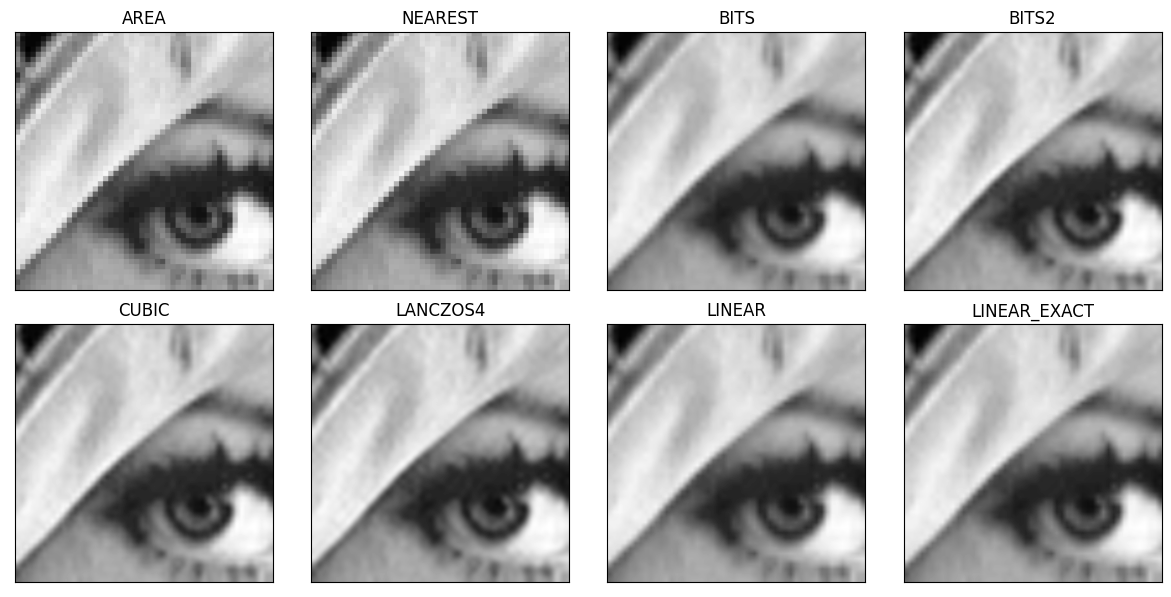

In [11]:
import cv2

img = cv2.imread('../data/Lena.png',cv2.IMREAD_GRAYSCALE)
img1 = img[230:280,230:280].copy()

modes = [cv2.INTER_AREA, cv2.INTER_NEAREST, cv2.INTER_BITS, cv2.INTER_BITS2,\
    cv2.INTER_CUBIC, cv2.INTER_LANCZOS4, cv2.INTER_LINEAR, cv2.INTER_LINEAR_EXACT]
title = ['AREA', 'NEAREST', 'BITS', 'BITS2',\
    'CUBIC', 'LANCZOS4', 'LINEAR', 'LINEAR_EXACT']

#cv2.INTER_NEAREST (0dim) cv2.INTER_LINEAR(1dim) 속도 차이가 별로 없기 떄문에 보통 linear 씀

resized = []
for mode in modes:
    res = cv2.resize(img1, (0, 0), fx=10, fy=10, interpolation=mode)
    resized.append(res)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.title(title[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(resized[i],cmap='gray')
plt.tight_layout()
plt.show()

#### (2) cv2.flip()

In [5]:
img_flip_along_x = cv2.flip(img, 0) #수직 대칭
img_flip_along_x_along_y = cv2.flip(img_flip_along_x, 1) #수평 대칭
img_flipped_xy = cv2.flip(img, -1) #수평 수직 대칭

# check that sequential flips around x and y equal to simultaneous x-y flip
assert img_flipped_xy.all() == img_flip_along_x_along_y.all()

cv2.namedWindow("img_flipped_xy", cv2.WINDOW_AUTOSIZE)
cv2.namedWindow("img_flip_along_x_along_y", cv2.WINDOW_AUTOSIZE)
cv2.imshow("img_flip_along_x_along_y", img_flip_along_x_along_y)
cv2.imshow("img_flipped_xy", img_flipped_xy)
cv2.waitKey()
cv2.destroyAllWindows()

#bgr, gray flip 가능

#### (3) Affine Transform

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
#점 세개만 찍음 마지막 점은 평행사변형이기 때문에 안정해도 됨

def mouse_callback(event, x, y, flags, param):
    global selected_pts, show_img

    if event == cv2.EVENT_LBUTTONUP:
        selected_pts.append([x, y])
        cv2.circle(show_img, (x, y), 10, (0, 255, 0), 3)


def select_points(image, points_num):
    global selected_pts
    selected_pts = []
    
    cv2.namedWindow('image')
    cv2.setMouseCallback('image', mouse_callback)

    while True:
        cv2.imshow('image', image)

        k = cv2.waitKey(1)

        if k == 27 or len(selected_pts) == points_num:
            break

    cv2.destroyAllWindows()

    return np.array(selected_pts, dtype=np.float32)


img = cv2.imread('../data/circlesgrid.png', cv2.IMREAD_COLOR)  # messi5.jpg, circlesgrid.png
Height, Width = img.shape[:2]
show_img = np.copy(img)

selected_pts = []

''' Affine Transformation
좌하단 - 좌상단 - 우상단 코너에 대응될 원본 영상 내의 화소점을 순서대로 선택 '''
W, H = 512, 512
show_img = np.copy(img)
src_pts = select_points(show_img, 3)
dst_pts = np.array([[0, H], [0, 0], [W, 0]], dtype=np.float32)
''' 세 점을 이용해서 어파인 변환 (2,3) 행렬을 구성한다 '''
affine_m = cv2.getAffineTransform(src_pts, dst_pts)

''' 어파인 변환을 수행해서 목적 영상을 생성한다 '''
unwarped_img = cv2.warpAffine(img, affine_m, (W, H))

cv2.imshow('original', show_img)
cv2.imshow('unwarped', unwarped_img)
cv2.waitKey()
cv2.destroyAllWindows()

- Inverse Affine Transform

In [7]:
''' Inverse Affine Transformation
좌하단 - 좌상단 - 우상단 코너에 대응될 원본 영상 내의 화소점을 순서대로 선택 '''

inv_affine = cv2.invertAffineTransform(affine_m)
warped_img = cv2.warpAffine(unwarped_img, inv_affine, (Width, Height))

cv2.imshow('original', show_img)
cv2.imshow('unwarped', unwarped_img)
cv2.imshow('warped', warped_img)
cv2.waitKey()
cv2.destroyAllWindows()

#### (4) Perspective Transform

In [8]:
''' Perspective Transform
좌하단 - 좌상단 - 우상단 - 우하단 코너에 대응될 원본 영상 내의 화소점을 순서대로 선택 '''
#4개의 점으로 잡아야 함 -> 찌그러진 사각형을 펼쳐 줌(자유도 높음)
W, H = 512, 512
show_img = np.copy(img)
src_pts = select_points(show_img, 4)
dst_pts = np.array([[0, H], [0, 0], [W, 0], [W, H]], dtype=np.float32) #찍어야 되는 점 순서 지정됨

perspective_m = cv2.getPerspectiveTransform(src_pts, dst_pts)

unwarped_img = cv2.warpPerspective(img, perspective_m, (W, H))

cv2.imshow('original', show_img)
cv2.imshow('unwarped', unwarped_img)
cv2.waitKey()
cv2.destroyAllWindows()
